In [49]:
from keras.datasets import cifar10                      #the dataset directly imported from keras 
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image                                  #importing the python imaging library

In [50]:
#Loading the CIFAR10 dataset
(X_train, Y_train) , (X_test, Y_test) = cifar10.load_data()

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)
(32, 32, 3)


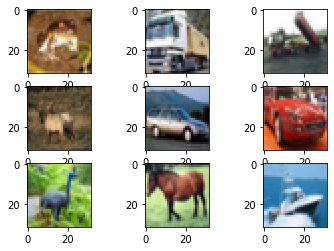

In [51]:
#Exploring the Dataset
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

#The dataset is 50000 X 32 X 32 dimension for Training and 10000 X 32 X 32 for Testing with 3 channels for RGB.

print(X_train[0].shape)

#getting some Images
for i in range(0,9):
    plt.subplot(330 + 1 + i)                #330 denotes 3X3 and the position
    img = X_train[i].transpose([0,1,2])     
    plt.imshow(img)                         #to plot the images in the subplot
    
plt.show()


In [52]:
#Preprocessing the dataset
seed = 6
np.random.seed(seed)               #To ensure the results on same data every time when compiling it

#Loading the data again for the seed
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

#normalizing the inputs from 0-255 to 0-1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255.0
X_test = X_test/255.0

print(X_train[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


In [53]:
#Exploring Labels data

print(Y_train.shape)
print(Y_train[0])

#Building a vector for each label by getting the labelled index as 1 and all others 0
#It avoids biasing and normalizes the network

Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
n = Y_test.shape[1]



(50000, 1)
[6]


In [54]:
#Deploying the models

from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
#Dropout - for regularization
#Activation - The Activation functions
#Conv2D - The main Convolution network
from keras.optimizers import SGD   #Stochastic Gradient Descent for optimizing the layer

In [55]:
#A function for the whole model

def allcnn(weights  = None):
    
    #the model type
    model = Sequential()
    
    #adding the layers via keras
    model.add(Conv2D(96,(3,3),padding = 'same',input_shape=(32,32,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3),padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3),padding = 'same',strides = (2,2)))
    model.add(Dropout(0.5))     #pick out specific neurons and have them dropout
    
    model.add(Conv2D(192,(3,3),padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding = 'same',strides = (2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192,(3,3),padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(1,1),padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10,(1,1),padding = 'valid'))
    
    #Global average pooling layer with softmax
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    
    #Loading the weights
    if weights:
        model.load_weights(weights)     #to add pretrained weights if we want to
        
    #returning the model
    return model
        
    

In [56]:

#defining hyperparameters
#learning_rate = 0.01
#weight_decay = 1e-6
#momentum = 0.9

#building the model
#model = allcnn()

#defining optimizer and compiling the model
#sgd = SGD(lr = learning_rate, decay = weight_decay,momentum = momentum,nesterov = True)
#model.compile(loss = 'categorical_crossentropy',optimizer = sgd,metrics = ['accuracy'])

#printing model summary
#print(model.summary())

#define additional training parameters
#epochs = 350
#batch_size = 32

#fitting the model
#model.fit(X_train, Y_train,validation_data = (X_test, Y_test),epochs = epochs,batch_size = batch_size,verbose = 1)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_32 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_33 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 16, 16, 192)      

KeyboardInterrupt: 

In [60]:
#defining hyperparameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

#building the model
weights = 'all_cnn_weights_0.9088_0.4994.hdf5'
model = allcnn(weights)

#defining optimizer and compiling the model
sgd = SGD(lr = learning_rate, decay = weight_decay,momentum = momentum,nesterov = True)
model.compile(loss = 'categorical_crossentropy',optimizer = sgd,metrics = ['accuracy'])

#printing model summary
print(model.summary())


#Testing the model
# model.fit(X_train, Y_train,validation_data = (X_test, Y_test),epochs = epochs,batch_size = batch_size,verbose = 1)
scores = model.evaluate(X_test, Y_test, verbose = 1)
print('Accuracy: {}'.format(scores[1]))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_53 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_54 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_15 (Dropout)         (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 16, 16, 192)     

In [71]:
# make dictionary of class labels and names
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[20:29]
labels = np.argmax(Y_test[20:29],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

9/9 [==============================] - 0s 3ms/step


In [72]:
# print our predictions
print(predictions)

[[8.8504293e-10 6.4789514e-11 2.3085455e-12 1.5896270e-06 3.3953207e-04
  2.2172837e-01 5.5424696e-11 7.7793050e-01 1.9114052e-14 2.8197524e-08]
 [9.9992514e-01 4.6340168e-11 7.4807263e-05 7.4324409e-09 5.3220341e-11
  5.7305258e-11 1.4369732e-11 1.6582907e-13 5.7982801e-09 3.6786023e-09]
 [2.9899056e-08 9.7000909e-15 6.1346972e-09 1.3987503e-06 9.9999857e-01
  2.1472809e-08 1.3631438e-08 2.4175320e-13 1.1575605e-08 2.1884378e-12]
 [0.0000000e+00 5.1578637e-29 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 2.4656493e-36 1.0000000e+00]
 [5.4371276e-25 9.2292540e-21 6.1091159e-18 7.9475449e-06 1.6561433e-11
  9.9999201e-01 2.7056143e-18 7.0019630e-13 2.0828721e-25 1.8554784e-19]
 [1.0811373e-08 9.9886677e-09 9.1248482e-01 8.4000488e-04 3.9499078e-05
  8.6298734e-02 3.3612564e-04 1.0687165e-07 4.8905890e-10 7.8068751e-07]
 [6.1552957e-11 1.9034648e-14 2.3885402e-11 4.8621205e-06 9.9999475e-01
  3.2283003e-07 1.1073046e-12 1.0434505e-10 1.0027609e-14 

In [73]:
# these are individual class probabilities, should sum to 1.0 (100%)
for image in predictions:
    print(np.sum(image))

1.0
0.99999994
1.0
1.0
0.99999994
1.0000001
0.99999994
1.0
1.0


In [74]:
# use np.argmax() to convert class probabilities to class labels
class_result = np.argmax(predictions,axis=-1)
print(class_result)

[7 0 4 9 5 2 4 0 9]


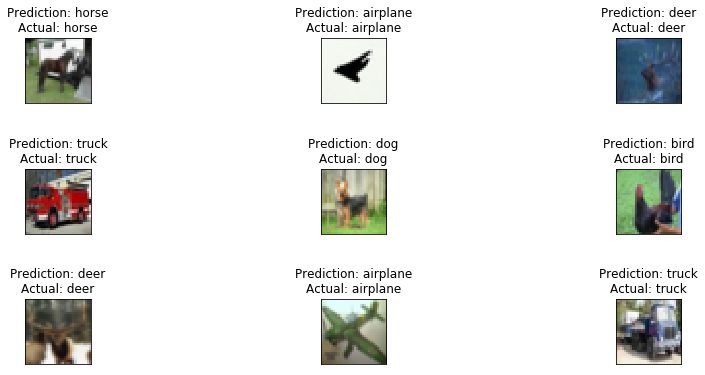

In [75]:
# create a grid of 3x3 images
fig, axs = plt.subplots(3, 3, figsize = (15, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):

    # determine label for each prediction, set title
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img.transpose([0,1,2]))
    
# show the plot
plt.show()